In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import infomap

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
%reload_ext autoreload
%autoreload 2
from src.pybioregions import bioregions

## Infomap Bioregions

For a basic tutorial, see [this notebook](https://github.com/mapequation/infomap-tutorial-notebooks/blob/main/IX.C.%20Infomap%20Bioregions.ipynb).

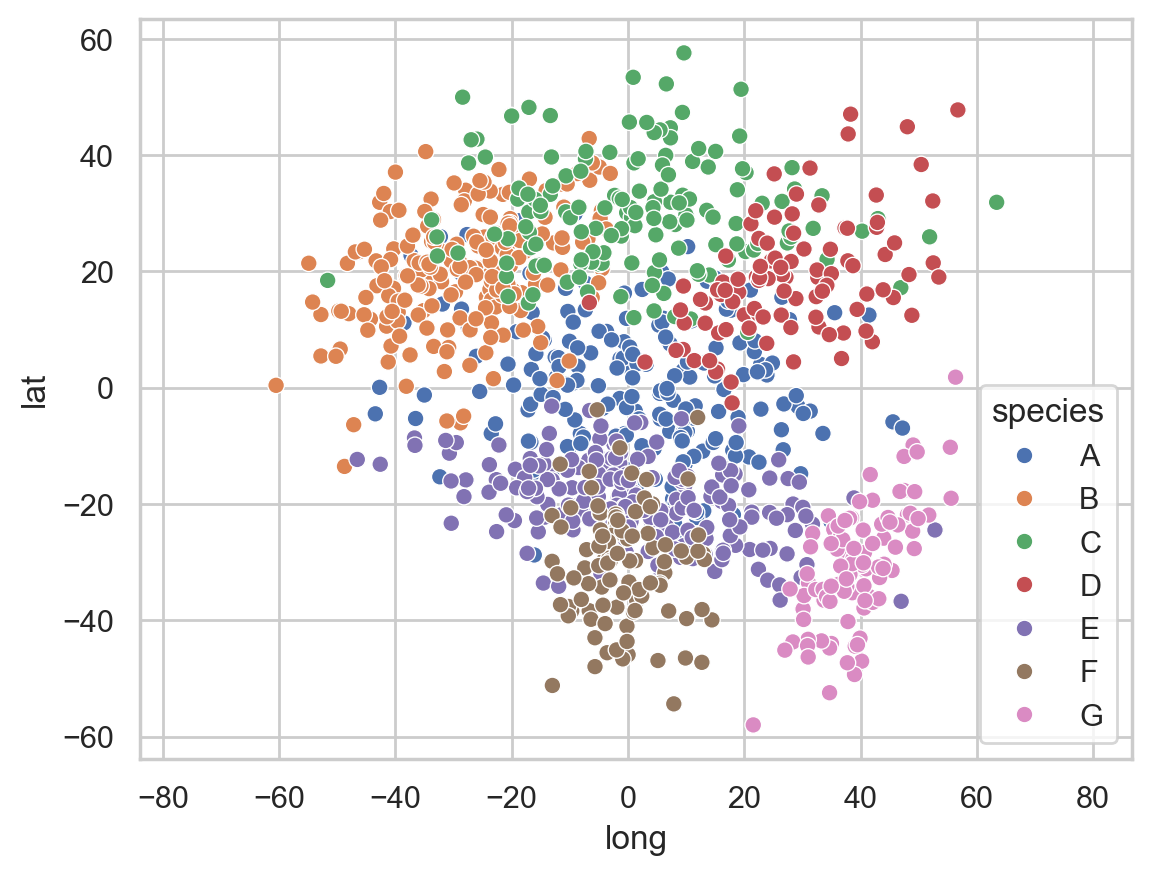

In [3]:
def sample_species_distribution(mean, cov, n_samples, name):
    df = pd.DataFrame(np.random.multivariate_normal(mean, cov, n_samples), columns=['long', 'lat'])
    df['species'] = name
    return df

species_params = [
    dict(mean=[0,0], cov=[[300, -50], [-50, 150]], n_samples=200, name="A"),
    dict(mean=[-30,20], cov=[[150, 50], [50, 100]], n_samples=200, name="B"),
    dict(mean=[0,30], cov=[[400, 0], [0, 100]], n_samples=150, name="C"),
    dict(mean=[30,20], cov=[[150, 50], [50, 100]], n_samples=100, name="D"),
    dict(mean=[0,-20], cov=[[300, -50], [-50, 50]], n_samples=200, name="E"),
    dict(mean=[0,-30], cov=[[50, 0], [0, 100]], n_samples=100, name="F"),
    dict(mean=[40,-30], cov=[[50, 50], [50, 100]], n_samples=100, name="G"),
]
def generate_species_distributions(species_params, seed=0):
    np.random.seed(seed)
    return pd.concat([sample_species_distribution(**params) for params in species_params], ignore_index=True)

df_records = generate_species_distributions(species_params)
sns.scatterplot(df_records, x="long", y="lat", hue="species").axis('equal');


In [4]:
br = bioregions.Bioregions(df_records, latlong_cols=["lat", "long"], resolution=4)

7 species found!
423 cells generated!


In [5]:
br.partition()

Found 1 modular levels with 6 top modules, [5.7] effective modules per level and codelength 5.370259808149121 with relative codelength savings 19.5%
Number of bioregions per level: [6]


<Axes: title={'center': 'Level 1/1: 6 modules, 6 bioregions, 5.37 bits (19.5% savings)'}>

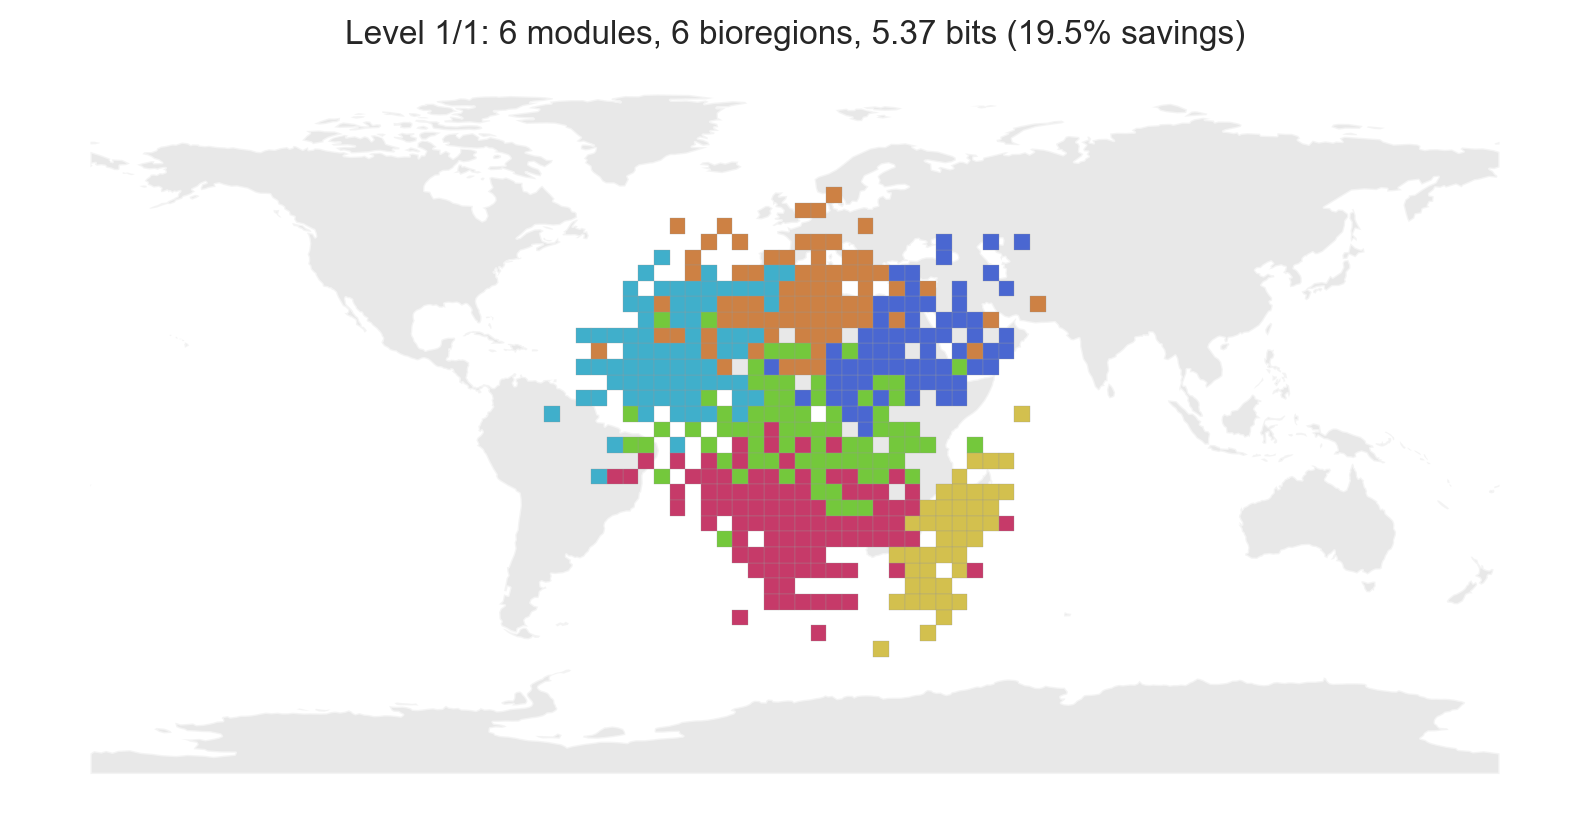

In [6]:
br.plot()

In [8]:
br.df

,long,lat,species,count,ilat,ilong,ilat_ilong,cell_id,species_id
0,-28.625394,13.522421,A,1,3.0,-8.0,3.0_-8.0,0,423
1,-9.088009,29.941740,A,1,7.0,-3.0,7.0_-3.0,1,423
2,-35.019423,-1.254875,A,1,-1.0,-9.0,-1.0_-9.0,2,423
3,-16.651776,3.205244,A,1,0.0,-5.0,0.0_-5.0,3,423
4,3.135503,4.032686,A,1,1.0,0.0,1.0_0.0,4,423
...,...,...,...,...,...,...,...,...,...
1045,31.001705,-46.317136,G,1,-12.0,7.0,-12.0_7.0,390,429
1046,40.511861,-30.114530,G,1,-8.0,10.0,-8.0_10.0,385,429
1047,39.477023,-44.210069,G,1,-12.0,9.0,-12.0_9.0,393,429
1048,40.768708,-36.610475,G,1,-10.0,10.0,-10.0_10.0,396,429


In [9]:
br.df_nodes

,name,type,degree,module,module_0
node,,,,,
423,A,species,122,2,2
424,B,species,95,4,4
425,C,species,96,3,3
426,D,species,66,5,5
427,E,species,88,1,1
...,...,...,...,...,...
238,9.0_3.0,cell,1,3,3
248,9.0_4.0,cell,1,3,3
244,9.0_5.0,cell,1,3,3


In [10]:
br.df_cells

,ilat,ilong,cell_name,geometry,module,bioregion,degree,endemic_count,module_0,bioregion_0
cell_id,,,,,,,,,,
13,-1.0,-1.0,-1.0_-1.0,"POLYGON ((0 -4, 0 0, -4 0, -4 -4, 0 -4))",2,1,1,NaN,2,1
29,-1.0,-2.0,-1.0_-2.0,"POLYGON ((-4 -4, -4 0, -8 0, -8 -4, -4 -4))",1,0,3,NaN,1,0
91,-1.0,-3.0,-1.0_-3.0,"POLYGON ((-8 -4, -8 0, -12 0, -12 -4, -8 -4))",2,1,1,NaN,2,1
81,-1.0,-4.0,-1.0_-4.0,"POLYGON ((-12 -4, -12 0, -16 0, -16 -4, -12 -4))",2,1,2,NaN,2,1
11,-1.0,-5.0,-1.0_-5.0,"POLYGON ((-16 -4, -16 0, -20 0, -20 -4, -16 -4))",2,1,1,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...
238,9.0,3.0,9.0_3.0,"POLYGON ((16 36, 16 40, 12 40, 12 36, 16 36))",3,3,1,NaN,3,3
248,9.0,4.0,9.0_4.0,"POLYGON ((20 36, 20 40, 16 40, 16 36, 20 36))",3,3,1,NaN,3,3
244,9.0,5.0,9.0_5.0,"POLYGON ((24 36, 24 40, 20 40, 20 36, 24 36))",3,3,1,NaN,3,3


In [11]:
br.df_species

,species,count,module,degree,module_0
id,,,,,
423,A,200,2,122,2
424,B,200,4,95,4
425,C,150,3,96,3
426,D,100,5,66,5
427,E,200,1,88,1
428,F,100,1,50,1
429,G,100,6,43,6
